# House Price Advanced Regression Techniques

### Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

### Practice Skills

Creative feature engineering 

Advanced regression techniques like random forest and gradient boosting

### Data

#### File descriptions

train.csv - the training set

test.csv - the test set

data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here

sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale


In [3]:
#Ignore the warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [4]:
import os
os.chdir("E:\\Kaggle\\Advacned-House-Price-Regression-master\\Data")

In [5]:
pwd

'E:\\Kaggle\\Advacned-House-Price-Regression-master\\Data'

### Load the packages

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
import sklearn

In [9]:
df_train = pd.read_csv("train.csv", index_col=None)
df_test = pd.read_csv("test.csv", index_col=None)

In [10]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [14]:
df_train.shape

(1460, 81)

#### Analyse the Sale price(Dependent Variable)

In [15]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\BLAZIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


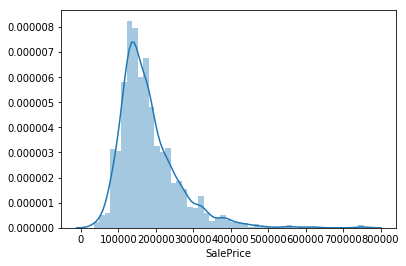

In [16]:
sns.distplot(df_train['SalePrice'])

In [17]:
print("Kurtosis %f" % df_train['SalePrice'].kurt())
print("Skewness %f" % df_train['SalePrice'].skew())

Kurtosis 6.536282
Skewness 1.882876


#### Correlation of the Sales Price to other variable

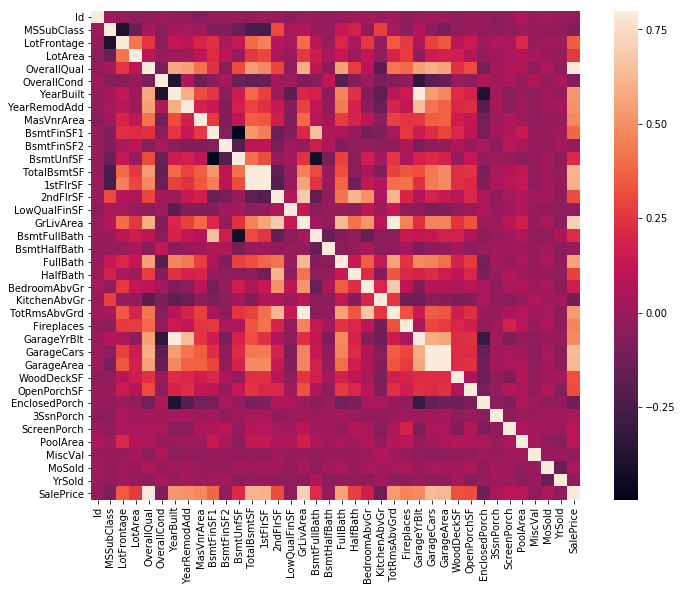

In [18]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True, vmax=.8)

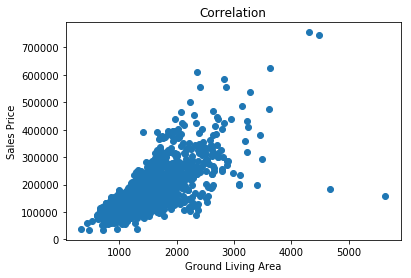

In [19]:
#Scatter plot of Ground Living Area and Sales price
plt.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'])
plt.xlabel('Ground Living Area')
plt.ylabel('Sales Price')
plt.title('Correlation')
plt.show()

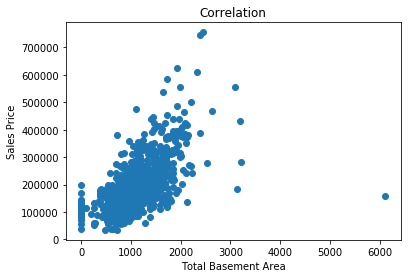

In [20]:
#Scatter plot of Total Basement Area and Sales price
plt.scatter(x=df_train['TotalBsmtSF'], y=df_train['SalePrice'])
plt.xlabel('Total Basement Area')
plt.ylabel('Sales Price')
plt.title('Correlation')
plt.show()

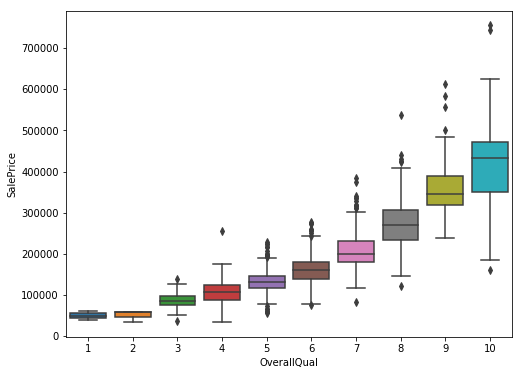

In [21]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_train, x='OverallQual', y='SalePrice')

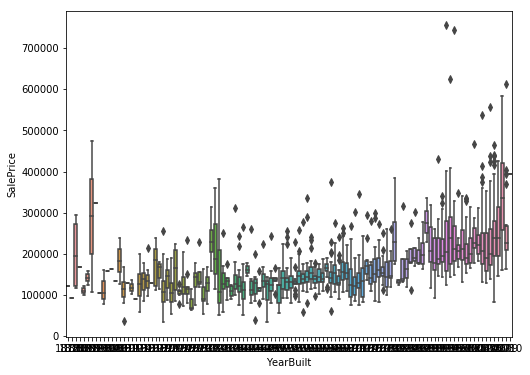

In [22]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_train, x='YearBuilt', y='SalePrice')

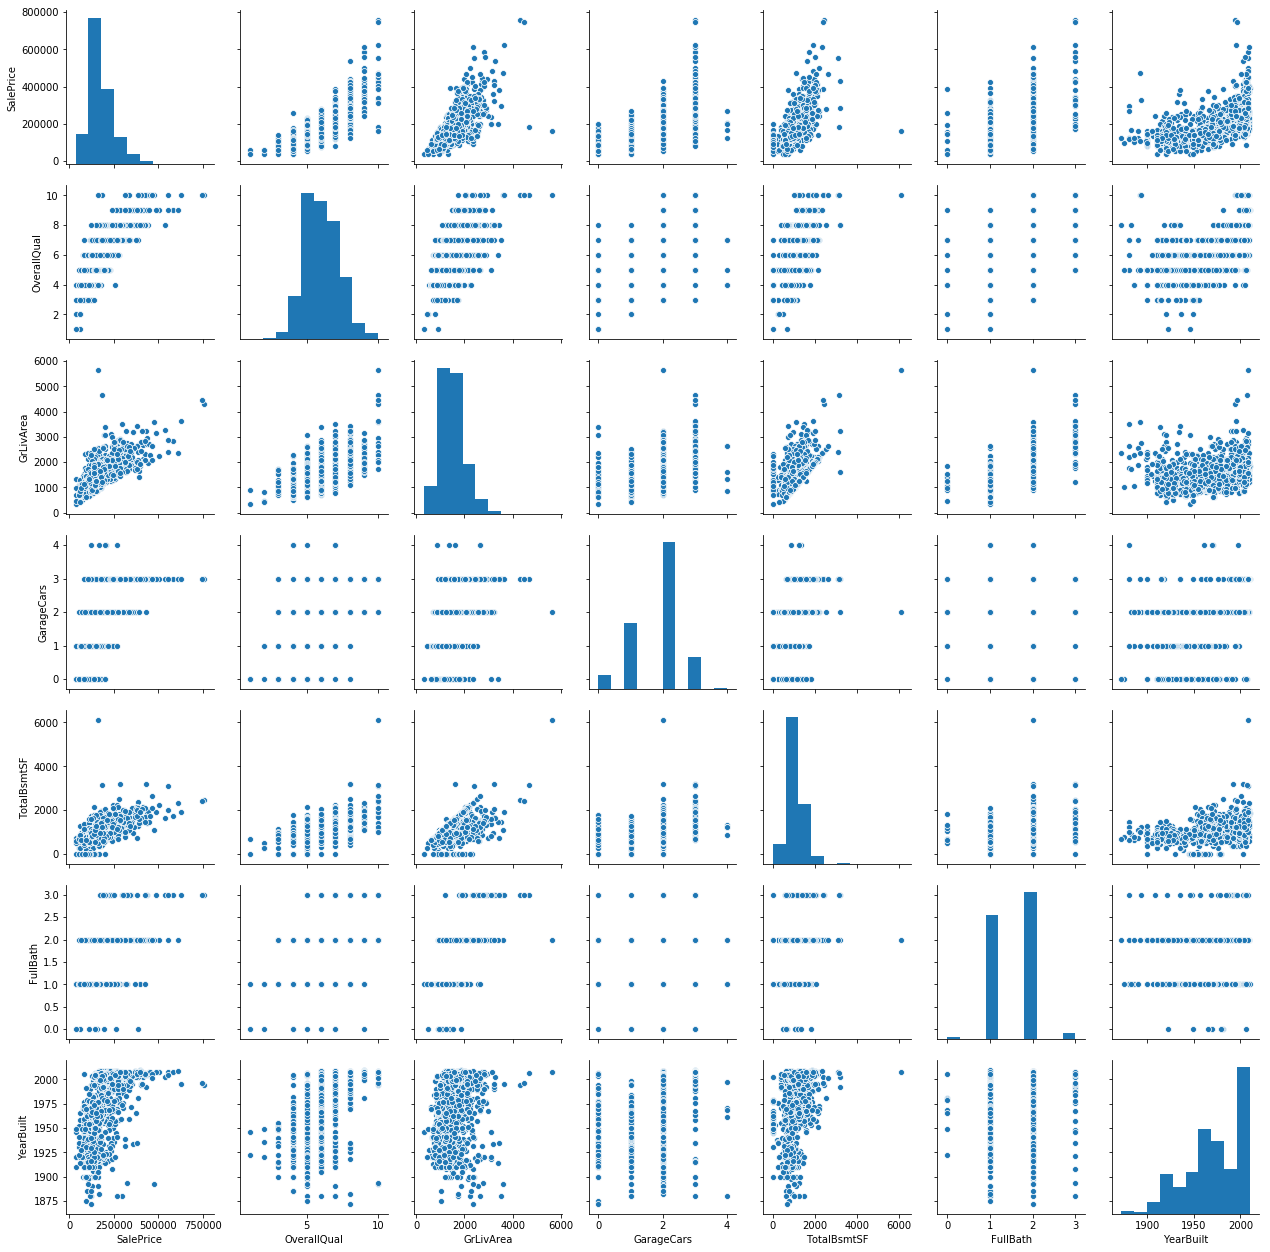

In [23]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

In [24]:
Total = df_train.isnull().sum().sort_values(ascending=False)
Percentage = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

In [25]:
missing_data = pd.concat([Total, Percentage], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


#### Dropping the ID Column

In [26]:
#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

In [27]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop('Id', axis = 1, inplace = True)
df_test.drop('Id', axis = 1, inplace = True)

In [28]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Treating Outliers

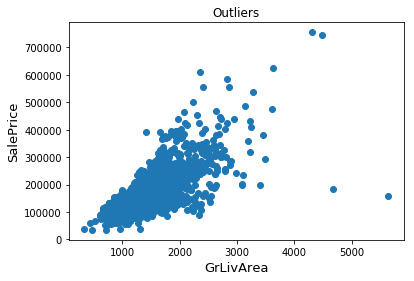

In [29]:
plt.scatter(data=df_train, x='GrLivArea' ,y='SalePrice')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.title('Outliers')
plt.show()

In [30]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']>300000)].index)

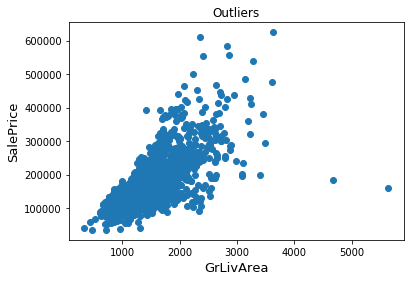

In [31]:
plt.scatter(data=df_train, x='GrLivArea' ,y='SalePrice')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.title('Outliers')
plt.show()

#### Target Variable Normalization

In [32]:
from scipy import stats
from scipy.stats import norm, skew

In [33]:
#Get the mean and STD from the SalePrice 
(mu, sigma) = norm.fit(df_train['SalePrice'])

In [34]:
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 180140.57 and sigma = 76619.56



Text(0.5, 1.0, 'SalePrice distribution')

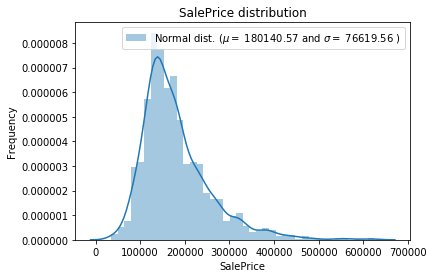

In [35]:
sns.distplot(df_train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

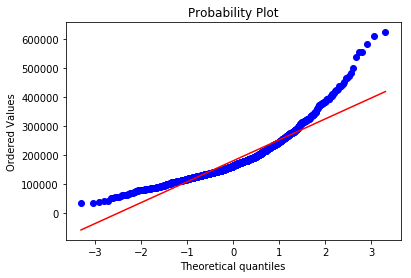

In [36]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

### feature Engineering

In [37]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]

In [38]:
y_train = df_train.SalePrice.values

In [39]:
y_train

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [40]:
df_full = pd.concat((df_train, df_test)).reset_index(drop=True)
df_full.drop(['SalePrice'], axis=1, inplace=True)

In [41]:
print("all DF Full is : {}".format(df_full.shape))

all DF Full is : (2917, 79)


#### Missing Data

In [42]:
#Missing Data
df_full_na = (df_full.isnull().sum() / len(df_full)) * 100
df_full_na = df_full_na.drop(df_full_na[df_full_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_full_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.459376
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

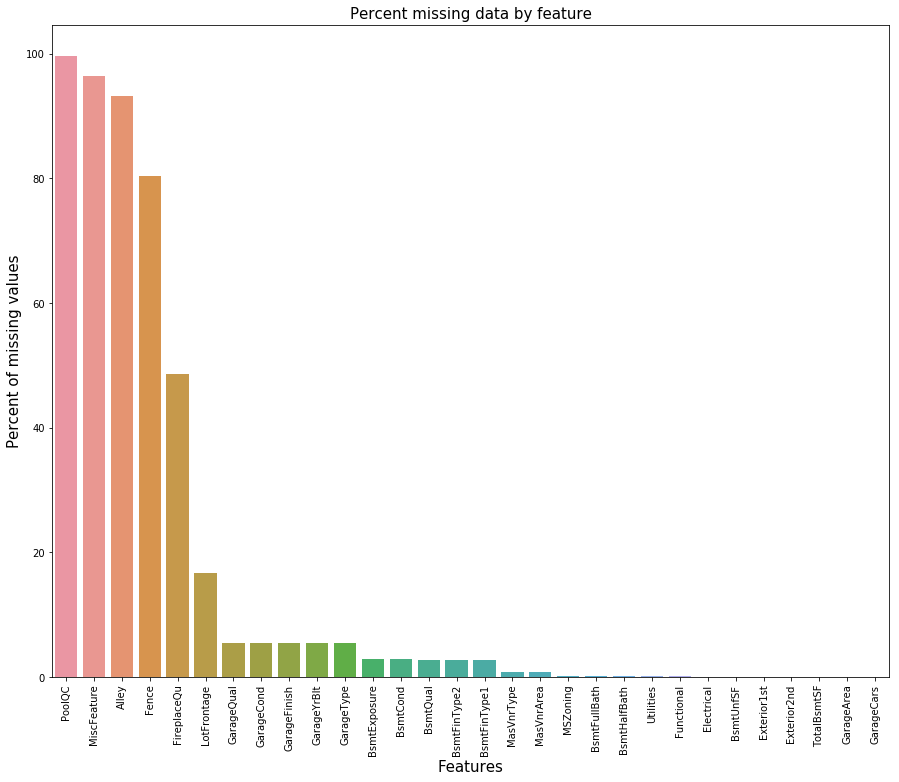

In [43]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=df_full_na.index, y=df_full_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

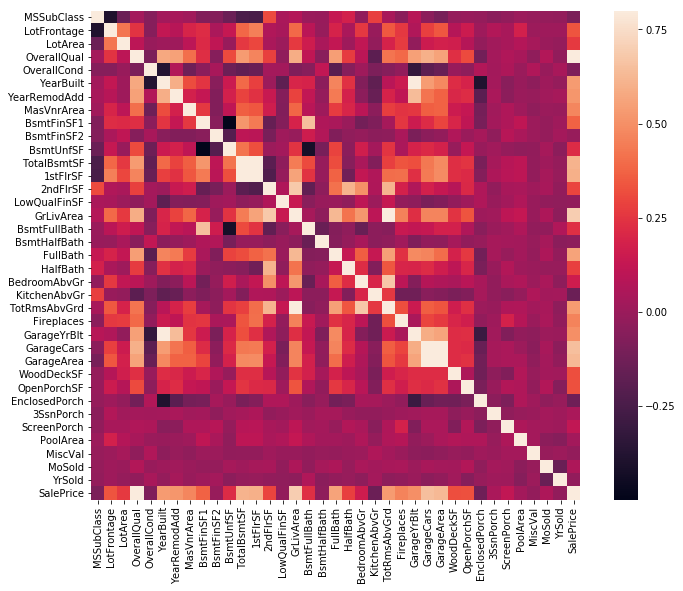

In [44]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, square=True, vmax=.8)

#### Fille Missing data

In [45]:
#Fill NA to None in PoolQC
df_full['PoolQC'] = df_full['PoolQC'].fillna('None')

In [46]:
#Fill NA to None in Misc Feature
df_full['MiscFeature'] = df_full['MiscFeature'].fillna('None')

In [47]:
#Fill NA to None in Alley
df_full['Alley'] = df_full['Alley'].fillna('None')

In [48]:
#Fill NA to None in Fence
df_full['Fence'] = df_full['Fence'].fillna('None')

In [49]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df_full['LotFrontage'] = df_full.groupby('Neighborhood')['LotFrontage'].transform(lambda x : x.fillna(x.median()))

In [50]:
#GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_full[col] = df_full[col].fillna('None')

In [51]:
#GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_full[col] = df_full[col].fillna(0)

In [52]:
#BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_full[col] = df_full[col].fillna(0)

In [53]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_full[col] = df_full[col].fillna('None')

In [54]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
df_full["MasVnrType"] = df_full["MasVnrType"].fillna("None")
df_full["MasVnrArea"] = df_full["MasVnrArea"].fillna(0)

In [55]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL
df_full['MSZoning'] = df_full['MSZoning'].fillna(df_full['MSZoning'].mode()[0])

In [56]:
#Utilities : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.
df_full = df_full.drop(['Utilities'], axis=1)

In [57]:
#Functional : data description says NA means typical
df_full["Functional"] = df_full["Functional"].fillna("Typ")

In [58]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
df_full['Electrical'] = df_full['Electrical'].fillna(df_full['Electrical'].mode()[0])

In [59]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
df_full['KitchenQual'] = df_full['KitchenQual'].fillna(df_full['KitchenQual'].mode()[0])

In [60]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
df_full['Exterior1st'] = df_full['Exterior1st'].fillna(df_full['Exterior1st'].mode()[0])
df_full['Exterior2nd'] = df_full['Exterior2nd'].fillna(df_full['Exterior2nd'].mode()[0])

In [61]:
#SaleType : Fill in again with most frequent which is "WD"
df_full['SaleType'] = df_full['SaleType'].fillna(df_full['SaleType'].mode()[0])

In [62]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None
df_full['MSSubClass'] = df_full['MSSubClass'].fillna("None")

In [63]:
#FireplaceQu : data description says NA means "no fireplace"
df_full["FireplaceQu"] = df_full["FireplaceQu"].fillna("None")

In [64]:
#Missing Data
df_full_na = (df_full.isnull().sum() / len(df_full)) * 100
df_full_na = df_full_na.drop(df_full_na[df_full_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_full_na})
missing_data.head(20)

,Missing Ratio


#### Converting the Variable to categorical

In [65]:
#convert the numeric catergorical data to string
for col in ('MSSubClass', 'OverallCond', 'YrSold', 'MoSold'):
    df_full[col] = df_full[col].astype(str)

#### Converting categorical using Label Encoder

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_full[c].values)) 
    df_full[c] = lbl.transform(list(df_full[c].values))

#### Adding total area of the house as new feature

In [68]:
df_full['TotalSF'] = df_full['TotalBsmtSF'] + df_full['1stFlrSF'] + df_full['2ndFlrSF']

#### Skewed features

In [69]:
numeric_feats = df_full.dtypes[df_full.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_full[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.782130
LotArea,12.835958
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


#### Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

Note that setting  λ=0  is equivalent to log1p used above for the target variable.

In [70]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_full[feat] = boxcox1p(df_full[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 59 skewed numerical features to Box Cox transform


In [71]:
numeric_feats = df_full.dtypes[df_full.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_full[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
PoolArea,15.759328
3SsnPorch,8.921650
LowQualFinSF,8.741030
MiscVal,5.594963
LandSlope,4.530264
BsmtHalfBath,3.800151
KitchenAbvGr,3.697303
ScreenPorch,2.977052
BsmtFinSF2,2.563235
EnclosedPorch,2.024321


In [72]:
df_full = pd.get_dummies(df_full)

In [73]:
df_full.shape

(2917, 221)

#### Splitting back to the train and test data

In [74]:
x_train = df_full[:ntrain]
x_test = df_full[ntrain:]

In [136]:
x_test.shape

(1459, 221)

#### Cross Fold validation for the models with RMSE

In [76]:
#Validation function
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Modelling the data

In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

#### Multiple Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
lm = LinearRegression(fit_intercept=True, n_jobs=-1)

In [80]:
#Cross fold score
score = rmsle_cv(lm)

In [81]:
print("Linear Regression score: Mean - {:.4f} STD - ({:.4f})\n".format(score.mean(), score.std()))

Linear Regression score: Mean - 174685993591356.9062 STD - (175031636168965.6250)



In [82]:
Linear_Reg_Model = lm.fit(x_train, y_train)

In [83]:
Linear_Reg_Model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [84]:
Linear_Reg_Model.intercept_

1902460859035859.5

In [85]:
Linear_Reg_Model.coef_

array([ 5.61037225e+03,  1.68439486e+03,  2.45690001e+02,  3.38789659e+03,
       -1.58562299e+04,  3.15732693e+03, -4.03871129e+03,  1.09649677e+03,
       -4.93859836e+02,  9.85269665e+02, -3.27785044e+03,  6.70441004e+03,
       -7.03155933e+02, -1.25432699e+04, -8.43766983e+02, -2.23788091e+03,
        1.86592493e+02, -3.17981644e+03, -2.26506197e+04, -5.78808702e+02,
       -1.02653673e+02,  4.83363902e+03,  1.08650864e+04,  1.30286789e+04,
        2.22079672e+03,  1.35592223e+04,  3.54794913e+03, -1.16556294e+03,
       -3.02387743e+03,  4.83240749e+03, -4.64554019e+02,  4.22172483e+03,
       -1.66294424e+03, -3.01729923e+04, -1.44555035e+04,  7.88101685e+03,
        5.53871545e+03, -4.22228347e+02,  1.81324602e+03,  1.00385602e+03,
        2.26539342e+03,  1.84142058e+03, -6.43850231e+02,  4.58209568e+02,
        9.80380131e+01,  1.95529036e+04,  3.04460475e+04,  1.50961673e+03,
        5.75885648e+03,  5.45185949e+04,  1.00836238e+03,  4.84965712e+04,
        1.41647210e+04, -

In [86]:
y_pred = Linear_Reg_Model.predict(x_test)

In [87]:
y_pred

array([121974.  , 160988.25, 182448.75, ..., 177610.25, 125057.5 ,
       223072.  ])

In [88]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred
sub.to_csv('submission.csv',index=False)

#### Traditional methods like cross-validation, stepwise regression to handle overfitting and perform feature selection work well with a small set of features but these techniques are a great alternative when we are dealing with a large set of features.

##### L2 Ridge Regression

##### Linear least squares with l2 regularization.

Minimizes the objective function:

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape [n_samples, n_targets]).

class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None)[source]¶

##### Ridge regression 

adds “squared magnitude” of coefficient as penalty term to the loss function. Here the highlighted part represents L2 regularization element.


Cost function
Here, if lambda is zero then you can imagine we get back OLS. However, if lambda is very large then it will add too much weight and it will lead to under-fitting. Having said that it’s important how lambda is chosen. This technique works very well to avoid over-fitting issue.

In [89]:
from sklearn.linear_model import Ridge
ridge = make_pipeline(RobustScaler(), Ridge(alpha=0.00005, random_state=1))

In [90]:
score = rmsle_cv(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Ridge score: 31362.4085 (3643.7052)



In [91]:
Ridge_Reg_Model = ridge.fit(x_train, y_train)

In [92]:
Ridge_Reg_Model

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridge', Ridge(alpha=5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='auto', tol=0.001))])

In [93]:
y_pred = Ridge_Reg_Model.predict(x_test)

In [94]:
y_pred

array([121978.99394747, 160984.38685628, 182448.45501299, ...,
       177609.21551075, 125060.79987947, 223071.53720874])

In [95]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred
sub.to_csv('submission.csv',index=False)

#### L1 Lasso regression

##### LASSO Regression :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

##### L1 regularization technique is called Lasso Regression 

##### Lasso Regression (Least Absolute Shrinkage and Selection Operator) adds “absolute value of magnitude” of coefficient as penalty term to the loss function.

#####  Lasso shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

##### Linear Model trained with L1 prior as regularizer (aka the Lasso)

The optimization objective for Lasso is:

(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

Technically the Lasso model is optimizing the same objective function as the Elastic Net with l1_ratio=1.0 (no L2 penalty).

In [96]:
from sklearn.linear_model import Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))

In [97]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 31040.0985 (4007.4812)



In [98]:
Lasso_Reg_Model = lasso.fit(x_train, y_train)

In [99]:
Lasso_Reg_Model

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [100]:
y_pred = Lasso_Reg_Model.predict(x_test)

In [101]:
y_pred

array([122081.56815305, 160997.50911495, 182451.46084093, ...,
       177632.12420937, 125144.34297513, 223072.1335095 ])

In [102]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred
sub.to_csv('submission.csv',index=False)

### Decision Tree Regression

In [103]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='mse', splitter='best', 
                           max_depth=None, min_samples_split=2, min_samples_leaf=2,
                           random_state=294, max_leaf_nodes=None
                          )

In [104]:
Decision_Tree_Model = dt.fit(x_train, y_train)

In [105]:
Decision_Tree_Model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=294, splitter='best')

In [106]:
y_pred = Decision_Tree_Model.predict(x_test)

In [107]:
y_pred

array([128383.33333333, 153133.33333333, 191500.        , ...,
       167000.        , 124800.        , 222500.        ])

In [108]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred
sub.to_csv('submission.csv',index=False)

### Random Forest Regression

In [109]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='mse', n_estimators=5000, random_state=294, n_jobs=-1)

In [110]:
Random_Forest_Model = rf.fit(x_train, y_train)

In [111]:
Random_Forest_Model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=-1,
           oob_score=False, random_state=294, verbose=0, warm_start=False)

In [112]:
y_pred = Random_Forest_Model.predict(x_test)

In [113]:
y_pred

array([124908.0526, 159313.0736, 181735.2972, ..., 168372.1426,
       120552.2746, 233236.798 ])

In [114]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred
sub.to_csv('submission.csv',index=False)

In [115]:
params_rf = {
             'n_estimators': [100, 350, 500],
             'max_features': ['log2', 'auto', 'sqrt'],
             'min_samples_leaf': [2, 10, 30], 
             }

from sklearn.model_selection import GridSearchCV

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

In [116]:
# Extract the best estimator
best_model = grid_rf.estimator

In [117]:
best_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=-1,
           oob_score=False, random_state=294, verbose=0, warm_start=False)

### Gradient Boosting regressor

In [118]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, 
                               loss='ls', subsample=0.5 ,max_depth=10, criterion='mse',
                               max_features='sqrt', min_samples_leaf=15, min_samples_split=10, 
                               random_state=294,
                              )

In [119]:
Gradient_Boost_Model = gb.fit(x_train, y_train)

In [120]:
Gradient_Boost_Model

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=10,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             n_iter_no_change=None, presort='auto', random_state=294,
             subsample=0.5, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [121]:
y_pred = Gradient_Boost_Model.predict(x_test)

In [122]:
y_pred

array([133276.41137407, 163743.80050556, 198111.4401331 , ...,
       148053.09435268, 123157.44406005, 217295.84466261])

In [123]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred
sub.to_csv('submission.csv',index=False)

### Extreme Gradient Boosting xgBoost

In [124]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =294, nthread = -1)

In [125]:
xtreme_grad_boost = model_xgb.fit(x_train, y_train)

In [126]:
xtreme_grad_boost

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=294, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [127]:
y_pred = xtreme_grad_boost.predict(x_test)

In [128]:
y_pred

array([124735.19 , 164088.8  , 186767.7  , ..., 170550.62 , 114167.945,
       222669.9  ], dtype=float32)

In [129]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred
sub.to_csv('submission.csv',index=False)

### Neural Network

In [132]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [133]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [134]:
seed = 294
np.random.seed(seed)

In [145]:
model = Sequential()
model.add(Dense(200, input_dim=221, kernel_initializer='normal', activation='relu'))
model.add(Dense(1000, kernel_initializer='normal', activation='relu'))
model.add(Dense(750, kernel_initializer='normal', activation='relu'))
model.add(Dense(500, kernel_initializer='normal', activation='relu'))
model.add(Dense(250, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

In [ ]:
model.fit(x_train, y_train, epochs=500, batch_size=10)

Epoch 1/500
1458/1458 [==============================] - 4s 3ms/step - loss: 7622850090.4472
Epoch 2/500
1458/1458 [==============================] - 4s 3ms/step - loss: 2492834411.1715
Epoch 3/500
1458/1458 [==============================] - 4s 3ms/step - loss: 1985402867.3141
Epoch 4/500
1458/1458 [==============================] - 4s 3ms/step - loss: 1965178155.9616
Epoch 5/500
1458/1458 [==============================] - 4s 3ms/step - loss: 1605912127.0343
Epoch 6/500
1458/1458 [==============================] - 4s 3ms/step - loss: 1504671523.0727
Epoch 7/500
1458/1458 [==============================] - 4s 3ms/step - loss: 1352104344.7353
Epoch 8/500
1458/1458 [==============================] - 4s 3ms/step - loss: 1404534418.7325
Epoch 9/500
1458/1458 [==============================] - 4s 3ms/step - loss: 1314835235.3580
Epoch 10/500
1458/1458 [==============================] - 4s 3ms/step - loss: 1227796742.6722
Epoch 11/500
1458/1458 [==============================] - 4s 3ms/step

In [140]:
model.evaluate(x_train, y_train)

1458/1458 [==============================] - 0s 60us/step


503189039.4951989

In [141]:
y_pred = model.predict(x_test)

In [142]:
y_pred

array([[127840.86 ],
       [154282.61 ],
       [180802.39 ],
       ...,
       [162238.8  ],
       [119484.766],
       [203497.62 ]], dtype=float32)

In [144]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = y_pred
sub.to_csv('submission.csv',index=False)